In [10]:
import agent as myagents
import gym
import matplotlib.pyplot as plt
from tqdm import tqdm
import utils
import numpy as np
from IPython.display import clear_output
import time
import gym_CliffWorld

### Environment

In [11]:
env = gym.make('cliff_world-v0')
seed = 12
train_session = None

### Agent

#### Markovian decision process interpretation

In [12]:
num_action, num_state = env.action_space, env.state_space

#### Agent config and hyperparameters

In [13]:
agent_init = {
    'seed': seed,
    'discount_factor': 1, 
    'learning_rate': 0.02, 
    'exploration_rate_decay': {
        'er': 0.1,
        'max_er': 1,
        'min_er': 0.0,
        'decay_er': 0.05,
        'constant_er': True
    },
    'eligibility_method': 'replace',
    'trace_decay': 0.9,
    'num_action': num_action,
    'num_state': num_state,
    'state_dim': (num_state, )
}

#### Creating Agent

In [14]:
if not train_session:
    print('Train Session reset')
    train_session = utils.TrainSession({}, env, seed)

Train Session reset


In [15]:
sarsa_agent = myagents.SarsaAgent(agent_init)
q_learning_agent = myagents.QLearningAgent(agent_init)
sarsa_lambda_agent = myagents.SarsaLambdaAgent(agent_init)
expected_sarsa_agent = myagents.ExpectedSarsaAgent(agent_init)

In [16]:
agents = {
    'sarsa': sarsa_agent,
    'q_learning': q_learning_agent,
    'expected_sarsa': expected_sarsa_agent,
    'sarsa_lambda': sarsa_lambda_agent
}

In [17]:
train_session.append_agents(agents)

['sarsa', 'q_learning', 'expected_sarsa', 'sarsa_lambda']

### Training

In [18]:
n_episode = 50000
t_max_per_episode = 500
graphical = False

In [19]:
train_session.train(n_episode=n_episode, graphical=graphical)

100%|██████████| 50000/50000 [01:04<00:00, 777.66it/s] 


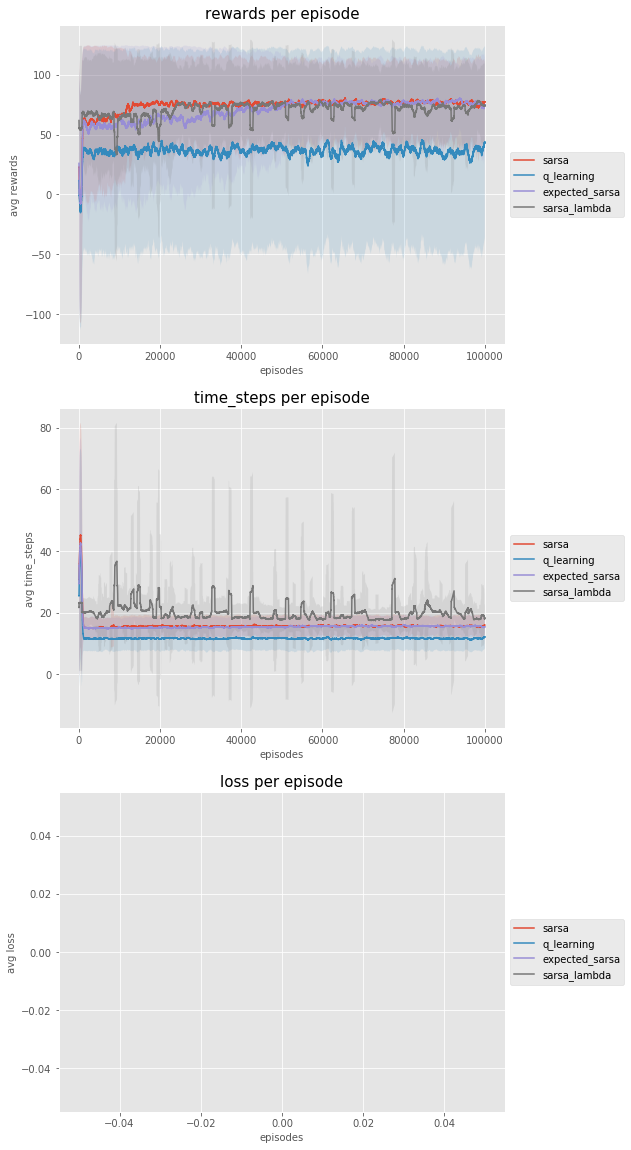

In [31]:
train_session.plot_results(window=750)

#### HEATMAP

In [32]:
import seaborn as sb

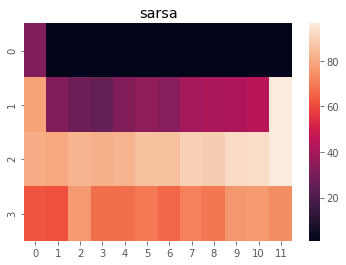

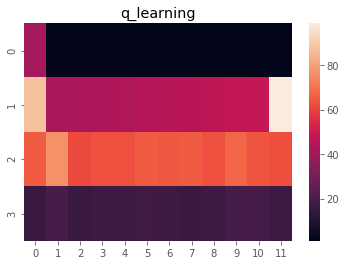

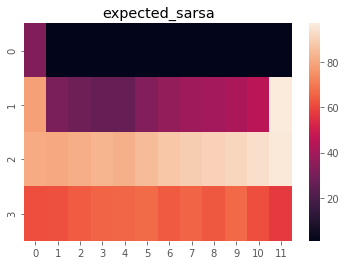

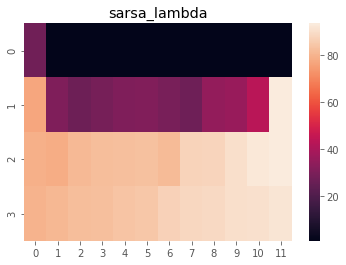

In [33]:
for agent_name, agent in agents.items():
    sb.heatmap(agent.q.reshape(4, 4, 12).mean(axis=0)).set_title(agent_name)
    plt.show()

### TESTING

In [41]:
n_episode_test = 4
agent_to_test = agents["expected_sarsa_agent"]
graphical = True

In [31]:
for i_episode in range(n_episode_test):
    
    rewards = 0
    state = env.reset()
    next_action = agent_to_test.episode_init(state)
    
    for t in range(t_max_per_episode):
        
        if graphical:
            clear_output(wait=True)
            env.render()
            time.sleep(0.2)
            
        
        state, reward, done, info = env.step(next_action)
        next_action = agent_to_test.e_greedy(state, always_greedy=True)
        if done:
            break

agent_to_test.epsilon.reset_episode_count()
env.close()

SXXXXXXXXXXG
___________T
____________
____________
